In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [42]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 150
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [3]:
#функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [35]:
V_1 = 0.465
T_01 = np.array([39.5, 40.4, 43.5, 38.9, 40.1, 39.2])
T_1 = np.array([16.9, 18.1, 17.6, 18.2, 17.1, 18.3])

V_2 = 0.385
T_02 = np.array([19.8, 18.7, 18.5, 18.2])
T_2 = np.array([13, 12.6, 13.3, 13.7])

V_3 = 0.435
T_03 = np.array([54.8, 53.2, 49.2, 59.8])
T_3 = np.array([14.6, 14.4, 15.2, 14.8])

V_4 = 0.425 #925
T_04 = np.array([10.2, 10.4, 9.8])
T_4 = np.array([23.1, 22.8, 23.1])

V_5 = 0.415
T_05 = np.array([29.1, 28.6, 32, 28.7, 30])
T_5 = np.array([10.5, 11.1, 11, 11.1, 11.3])

V_6 = 0.485
T_06 = np.array([20.1, 19.5, 20.8, 21.4, 20])
T_6 = np.array([16.5, 17.4, 16.5, 16.6, 16.9])

V_7 = 0.485
T_07 = np.array([25.5, 25.6, 24.2])
T_7 = np.array([12, 11.7, 12])

V = [V_1, V_2, V_3, V_4, V_5, V_6, V_7]
T = [T_1, T_2, T_3, T_4, T_5, T_6, T_7]
T_0 = [T_01, T_02, T_03, T_04, T_05, T_06, T_07]
data = list(zip(V, T, T_0))

In [36]:
[dat for dat in data]

[(0.465,
  array([16.9, 18.1, 17.6, 18.2, 17.1, 18.3]),
  array([39.5, 40.4, 43.5, 38.9, 40.1, 39.2])),
 (0.385, array([13. , 12.6, 13.3, 13.7]), array([19.8, 18.7, 18.5, 18.2])),
 (0.435, array([14.6, 14.4, 15.2, 14.8]), array([54.8, 53.2, 49.2, 59.8])),
 (0.425, array([23.1, 22.8, 23.1]), array([10.2, 10.4,  9.8])),
 (0.415,
  array([10.5, 11.1, 11. , 11.1, 11.3]),
  array([29.1, 28.6, 32. , 28.7, 30. ])),
 (0.485,
  array([16.5, 17.4, 16.5, 16.6, 16.9]),
  array([20.1, 19.5, 20.8, 21.4, 20. ])),
 (0.485, array([12. , 11.7, 12. ]), array([25.5, 25.6, 24.2]))]

In [8]:
def charge (V, T_0, T):
    V *= 1000
    l = 0.00727 #m
    rho = 898 # kg m3
    g = 9.8155 # m / s2
    h = 0.001 # m
    eta = 1.85e-5 # pa s
    
    Q = 9 * np.pi * (2 / rho / g) ** 0.5 * (eta * h) ** 1.5 * l / V * (T_0 + T) / T**1.5 / T_0
    return np.average(Q), np.std(Q)

In [87]:
for dat in data:
    print(*charge(*dat))

charges = np.array([charge(*dat)[0] for dat in data])
factors = np.array([2, 6, 2, 8, 4, 3, 3])
serrors = np.array([charge(*dat)[1] for dat in data]) / charges


2.1512757729667235e-19 7.160193632871368e-21
6.040408980332748e-19 1.529470741207227e-20
2.1041934934544237e-19 9.488329702556452e-21
8.194062466556766e-19 2.324067892170111e-20
4.3017742722095696e-19 1.6391234216311904e-20
3.8749907080725445e-19 9.269557804584228e-21
3.9743800115783845e-19 7.175014749468008e-21


In [137]:
def perror(U, t, t_0):
    return np.sqrt((0.01/U)**2 + 5 * (0.2/(t + t_0))**2)

perrors = np.array([perror(dat[0], np.mean(dat[1]), np.mean(dat[2])) for dat in data])
errors = np.sqrt(perrors**2 + serrors**2)
perrors

array([0.02284738, 0.0295055 , 0.02388471, 0.02712587, 0.02648569,
       0.02387714, 0.02390014])

In [114]:
for c, e in zip(charges, errors):
    print(round(c*1e19, 2), round(c*e*1e19, 2), round(e, 2))

2.15 0.09 0.04
6.04 0.23 0.04
2.1 0.11 0.05
8.19 0.32 0.04
4.3 0.2 0.05
3.87 0.13 0.03
3.97 0.12 0.03


x= 4.0 y= 4.377297957881595e-19
x2= 20.285714285714285 y2= 2.314304705969927e-37 xy= 2.1580157342154853e-18


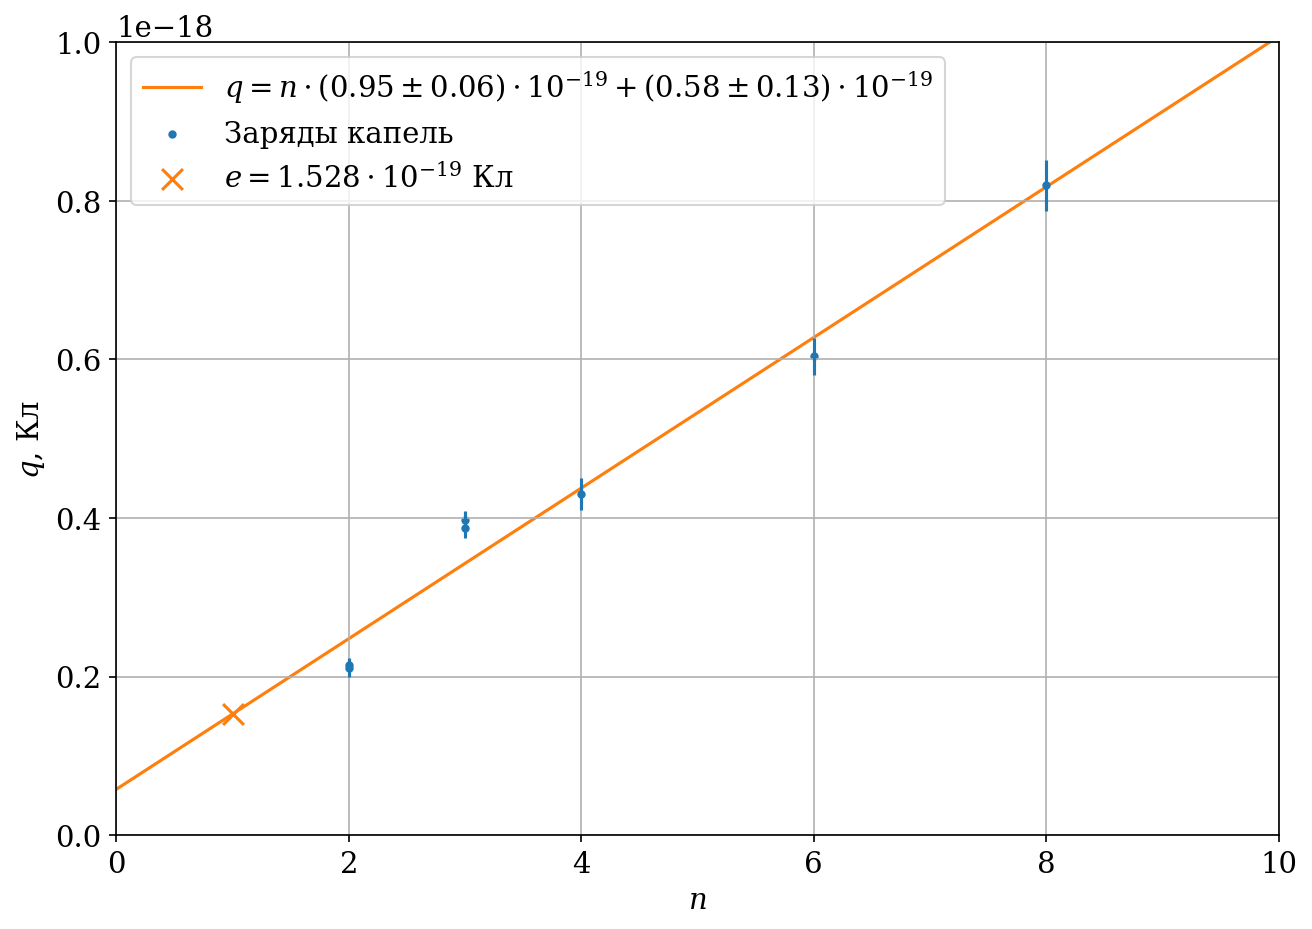

In [136]:
plt.scatter(factors, charges, marker='.', label="Заряды капель")
plt.errorbar(factors, charges, charges*errors, ls='')

f, coeff = lsf(factors, charges)
plt.plot(np.linspace(0, 10, 2), f(np.linspace(0, 10, 2)), zorder=0.5, 
         label="$q = n \cdot ({:.2f} \pm {:.2f}) \cdot 10^{} + ({:.2f} \pm {:.2f}) \cdot 10^{}$".format(
             coeff[0]*1e19, coeff[2]*1e19, "{-19}", coeff[1]*1e19, coeff[3]*1e19, "{-19}"))

plt.xlim(0, 10)
plt.ylim(0, 1e-18)

plt.scatter(1, f(1), marker='x', s=100, label="$e = {:.3f} \cdot 10^{}$ Кл".format(f(1)*1e19, "{-19}"))

plt.xlabel("$n$")
plt.ylabel("$q$, Кл")

plt.legend()

f(1),coeff[2]/coeff[0], coeff[3]/coeff[1]

plt.savefig("plot1.png")